Loaded data shape: (272, 2)
Top 5 rows
[[ 3.6   79.   ]
 [ 1.8   54.   ]
 [ 3.333 74.   ]
 [ 2.283 62.   ]
 [ 4.533 85.   ]]

Eruption time summary (s)
Min = 1.60, Max = 5.10
Mean = 3.49, Var = 1.2979388904492861, Std = 1.139271210225768

Wait time summary (s)
Min = 43.00, Max = 96.00
Mean = 70.90, Var = 184.14381487889273, Std = 13.569960017586371



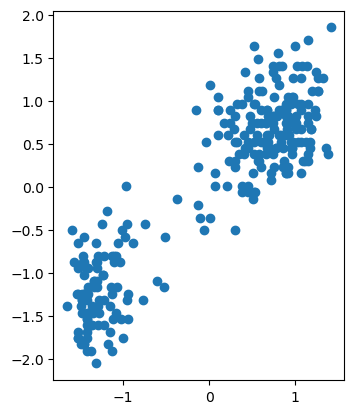

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = np.loadtxt('faithful_data.txt')
print(f'Loaded data shape: {data.shape}')
print(f'Top 5 rows')
print(data[:5])
print()


def print_summary(title, x):
    print(title)
    print(f'Min = {np.min(x):.02f}, Max = {np.max(x):.02f}')
    print(f'Mean = {np.mean(x):.02f}, Var = {np.var(x)}, Std = {np.std(x)}')
    print()


eruption_time_s = data[:, 0]
wait_time_s = data[:, 1]
    
print_summary('Eruption time summary (s)', eruption_time_s)
print_summary('Wait time summary (s)', wait_time_s)


def standardize(x):
    return (x - np.mean(x)) / np.std(x)


eruption_time_std = standardize(eruption_time_s)
wait_time_std = standardize(wait_time_s)

_, ax = plt.subplots()
ax.scatter(eruption_time_std, wait_time_std)
ax.set_aspect(1.0)
plt.show()

k = 1, energy = 544.0
k = 2, energy = 79.575959488277


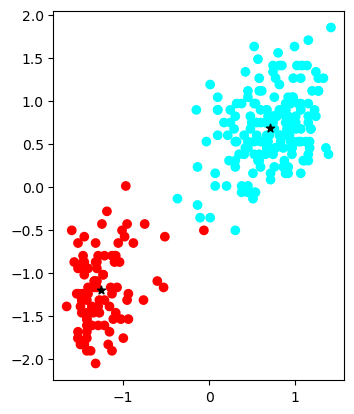

<Figure size 640x480 with 0 Axes>

In [22]:
data2 = np.column_stack([eruption_time_std, wait_time_std])

kmeans = {}
for k in (1, 2):
    kmeans[k] = KMeans(k).fit(data2)
    print(f'k = {k}, energy = {kmeans[k].inertia_}')


_, ax = plt.subplots()
c = np.array(['red', 'cyan'])[kmeans[2].labels_]
ax.scatter(eruption_time_std, wait_time_std, c=c)

for center in kmeans[2].cluster_centers_:
    ax.scatter(*center, c='black', marker='*')

ax.set_aspect(1.0)
plt.show()
plt.savefig('exercise2.jpg')